# B. Tutorial and Revision Manual

## B.1 A Bird's Eye View on MLE

A time series of returns

$$
r_1, r_2, ..., r_T.
$$

has a joint probability density function  

$$
f(r_{T},\ r_{T-1},\ \cdots,\ r_{2},\ r_{1};\theta).
$$

which can be written as

$$
f(r_{T},\ r_{T-1},\ \cdots,\ r_{2},\ r_{1};\theta)
=\left[ \prod_{t=2}^{T}f(r_{t}|r_{t-1},\ \cdots,\ r_{1};\theta) \right] \times f(r_{1};\theta).  
$$

$$
\\
$$

First, if returns are independent of each other:

$$
f(r_{T},\ r_{T-1},\ \cdots,\ r_{2},\ r_{1};\theta) \overbrace{=}^{indep} \,  \left[ \prod_{t=1}^{T}f(r_{t};\theta) \right].
$$

$$
\\
$$

Second, if returns are Markov: 

$$
f(r_{T},\ r_{T-1},\ \cdots,\ r_{2},\ r_{1};\theta) \overbrace{=}^{Markov} \left[ \prod_{t=2}^{T}f(r_{t}|r_{t-1};\theta) \right]\times f(r_{1};\theta).
$$

$$
\\
$$

In order to highlight that this joint likelihood function depends on $\theta$, we often write it as 

$$
L(\theta|\{r_t\}_{t \in [1,...,T]}) := f(r_{T},\ r_{T-1},\ \cdots,\ r_{2},\ r_{1};\theta), 
$$ 

or in short, simply $L(\theta)$. 



$$
\\
$$


**Three optimization approaches:** 

- Analytic Optimization  


- Grid Search


- Numerical Optimization  


$$
\\
$$

**Statistical properties of MLE in LARGE samples:** 

- Consistent; plim $\hat{\theta}_{ML}=\theta$  

- Asymptotically Normally Distributed; $\hat{\theta}_{ML}\sim N[\theta,\ \{I(\theta)\}^{-1}]$,  

- Variance of the MLE fulfills the Rao-Cramer lower bound,i.e. 'most efficient' (most precise) estimator  

- Invariance: rather than estimating a parameter $\theta$, we can instead estimate $g(\theta)$ and recover the MLE of $\theta$ from inverting $g(\theta)$.


$$
\\
$$

**Statistical properties of MLE in SMALL samples:** 

- not well understood

- do not use less than 100 observations 
 


 

## B.2 What's the Probability of a 10% Decline in the S&P 500? 

The probability of observing in a year five days with a negative return of more than 10\% would be

$$
Prob(y_t=5;\theta) \overbrace{=}^{Pois} \, \frac{e^{-\lambda} \lambda^{5}}{5!}.
$$

The joint likelihood equals 

\begin{align*}
L(\lambda) & = \frac{e^{-\lambda}\lambda^{y_{1}}}{y_{1}!}\times\frac{e^{-\lambda}\lambda^{y_{2}}}{y_{2}!}\times\ldots\times\frac{e^{-\lambda}\lambda^{y_{T}}}{y_{T}!} \\
&= \prod_{t=1}^{T}\frac{e^{-\lambda}\lambda^{y_{t}}}{y_{t}!}.
\end{align*}


The $\log$ likelihood is

$$
\ln L(\lambda) \ =\  -T\lambda\ +\sum_{t=1}^T y_{t}\ln(\lambda)-\sum_{t=1}^T \ln(y_{t}!)
$$

The MLE of $\lambda$ maximizes $\ln L(\lambda)$; hence leads to a zero gradient, i.e.

$$
\frac{\partial\ln L(\lambda)}{\partial\lambda}=-T+\frac{\sum_{t=1}^{T}y_{t}}{\lambda} \overbrace{=}^{!} 0
$$

We solve for $\lambda$:

$$
\hat{\lambda}_{ML}\ =\ \frac{\sum_{t=1}^{T}y_{t}}{T}.
$$

and check that the second derivative is negative.




 

## B.3 How Precise are MLE Parameter Estimates?

The Hessian matrix, i.e. $\frac{\partial^2 \ln L(\theta)}{\partial \theta \, \partial \theta'}$,  captures the 2nd derivative of the log-likelihood function and therefore the curvature of the log likelihood function. Hence, the more curvature, the larger the Hessian and the smaller the inverse of the Hessian and the smaller the standard error of $\hat{\theta}_{ML}$. 



$$
\\
$$

The MLE standard error coincides with the square root of the variance of the MLE estimator $\hat{\theta}_{ML}$. 

$$
var\ (\hat{\theta}_{ML})=[I(\hat{\theta}_{ML})]^{-1}
$$

$$
\\
$$

For a maximization problem, the ith-jth entry of the information matrix equals:

\begin{align*}
[I(\theta)]_{[i,j]} &:= E \left[ \left( \frac{\partial \ln L(\theta)}{\partial \theta_i} \right) \left( \frac{\partial \ln L(\theta)}{\partial \theta_j} \right) \right]   \\
&= -E \left[ \frac{\partial^{2}\ln {L}(\theta)}{\partial\theta_i\partial\theta_j} \right].
\end{align*}

$$
\\
$$


Notice, for a minimization problem you multiply the above expression by $-1$!

$$
\\
$$

The standard error of the vector-valued estimator, $\hat{\theta}_{ML}$, coincides with the square root of the diagonal elements of $var (\hat{\theta}_{ML})$.


$$
\\
$$

'Observed Fisher Information Matrix', which for a maximization problem reads

\begin{align*}
[I(\theta)]_{[i,j]} &:=  \left( \frac{\partial \ln L(\theta)}{\partial \theta_i} \right) \left( \frac{\partial \ln L(\theta)}{\partial \theta_j} \right) \\
&= -\frac{\partial^{2}\ln {L}(\theta)}{\partial\theta_i\partial\theta_j}
\end{align*}

where $\ln L = \sum_t \ln L_t$. 



## B.4 Computing Hessian Matrices using 1st or 2nd Derivatives 

For a maximization problem, you compute the Fisher Information matrix with either of both choices

$$
I(\theta) \equiv E \left[ \left( \frac{\partial \ln L(X;\theta)}{\partial \theta} \right)^2 \right] = - E \left[  \frac{\partial^2 \ln L(X;\theta)}{\partial \theta^2} \right].
$$


Let's define $f:=L(X;\theta)$ and note that $f = f(\theta)$.

\begin{align*}
- E \left[  \frac{\partial^2 \ln L(X;\theta)}{\partial \theta^2} \right] &= - E \left[  \frac{\partial}{\partial \theta} \left( 1/L(X;\theta) \times \frac{\partial L(X;\theta)}{\partial \theta} \right) \right] \\
&= E\left[ \frac{1}{f^2} f' f' - \frac{1}{f} f'' \right] \\
&= E\left[ \left( \frac{f'}{f} \right)^2 \right] -  E\left[ \frac{f''}{f} \right] \\
&= E [ ((\ln f)')^2] - E[\frac{f''}{f}] \\
&= E [ ((\ln f)')^2 \equiv I(\theta).
\end{align*}

where we used the product rule: 

$$
D(fg) = fg' + f'g. 
$$

The term -$E[\frac{f''}{f}] = 0$

because

\begin{align*}
-E[\frac{f''}{f}] &= - \frac{\partial^2}{\partial \theta^2} \int_{-\infty}^{\infty} f(x;\theta) \times \frac{f(x;\theta)}{f(x;\theta)} dx \\
&= - \frac{\partial^2}{\partial \theta^2} 1 = 0.
\end{align*}

## B.5 Learning about MLE using a Linear Problem, i.e. G-LRM 

Let's consider the linear regression problem with Gaussian regression error:

$$
y = X \beta + \epsilon; \; \epsilon \sim N(0,\sigma^2 I)
$$ 
with $dim(y) = T\times 1$ and $dim(X) = T\times k$ and $dim(\beta) = k \times 1$.



### B.5.1 Deriving the Log Likelihood

Likelihood for a single observation $y_i$:

$$
\mathcal{L}(y_{i}|x_i,\ \beta,\ \sigma^{2})=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(y_{i}-x_{i}\beta)^{2}}{2\sigma^{2}}}
$$

where $dim(x_i) = 1 \times k$.

$$
\\
$$

If $\epsilon$ is iid, then

$$
\mathcal{L}(y|X,\ \beta,\ \sigma^{2})=\prod_{i=1}^{T}\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(y_{i}-x_{i}\beta)^{2}}{2\sigma^{2}}}
$$

$$
\\
$$

which in log and matrix notation reads:


$$
\ln \mathcal{L}=\frac{-T}{2}\ln(2\pi)-\frac{T}{2}\ln(\sigma^{2})-\frac{1}{2\sigma^{2}}(y-X\beta)'(y-X\beta)
$$

$$
\\
$$

- appreciate the similarity to a L2 objective function

$$
\\
$$

- appreciate how the linear G-LRM objective function separates parameters from variance

### B.5.2 Optimizing $ln (L)$

The joint log likelihood function equals:

$$
\ln \mathcal{L}(y|X,\ \beta,\ \sigma^{2})\ =\ -\frac{T}{2}\ln(2\pi)-\frac{T}{2}\ln(\sigma^{2})-\frac{1}{2\sigma^{2}}[y'y-2y'X\beta+\beta'X'X\beta]
$$

$$
\\
$$

**FOC: beta:**
 
$$
\frac{\partial\ln \mathcal{L}}{\partial\beta}\ =\ -\frac{1}{2\sigma^{2}}\left[ \frac{\partial[y'y-2y'X\beta+\beta'X'X\beta]}{\partial\beta} \right]
$$

$$
= ... 
$$

 
$$ 
\frac{1}{\sigma^{2}}[X'y-X'X\beta] \overbrace{=}^{!} 0
$$

 
$$
\rightarrow \; \hat{\beta} = (X'X)^{-1}X'y
$$


$$
\\
$$
 

$$
\\
$$

**FOC: $\sigma^2$:**

 
$$
\frac{\partial\ln \mathcal{L}}{\partial\sigma^{2}}\ =\ -\frac{T}{2\sigma^{2}}+\frac{1}{2\sigma^{4}} \left[(y-X\beta)'(y-X\beta)\right] \overbrace{=}^{!} 0
$$

 
$$
...
$$

$$
\frac{1}{\sigma^{2}} \left[(y-X\beta)'(y-X\beta) \right]\ =\ T
$$

$$
\\
$$

Since we have already solved for $\hat{\beta}$, we can solve for $\sigma^{2}$ by replacing $\beta$ with its estimate:

$$
\frac{1}{\sigma^{2}}\left[(y-X\hat{\beta})'(y-X\hat{\beta})\right]\ =\ T
$$


$$
\rightarrow \; \hat{\sigma}^{2}=\frac{e'e}{T}.
$$

$$
\\
$$

- appreciate: linear G-LRM allows to optimize sequentially: first for parameters, then for variance of errors. 

- appreciate: Fifth, even if the model was non-linear in $\beta$ but with a Gaussian White Noise error, the ML solution for $\sigma^2$ will coincide with $\frac{e'e}{T}$.



### B.5.3 Getting Standard Errors

For a maximization problem we have:

$$
\hat{var}(\theta) = \left[I(\theta)\right]^{-1}\ =\ \left(-E \left[H(\theta)\right]\right)^{-1}.
$$

$$
\\
$$

**Jacobian:**

$$
\frac{\partial\ln \mathcal{L}}{\partial\theta}=\begin{pmatrix} \frac{X'(y-X\beta)}{\sigma^{2}}\\
-\frac{T}{2\sigma^{2}} +\frac{(y-X\beta)'(y-X\beta)}{2\sigma^{4}}
\end{pmatrix}
$$

$$
\\
$$
**Entries of Hessian:**

 
$$
\frac{\partial^{2}\ln \mathcal{L}}{\partial\beta \; \partial\beta}= ... = -\frac{X'X}{\sigma^{2}}
$$

$$
\displaystyle \frac{\partial^{2}\ln \mathcal{L}}{\partial\beta \; \partial\sigma^{2}}=...=-\frac{X'\epsilon}{\sigma^{4}}
$$


 

$$
\frac{\partial^{2}\ln \mathcal{L}}{\partial\sigma^{2} \; \partial\beta}\ =...=-\frac{\epsilon'X}{\sigma^{4}}
$$


 
$$
\frac{\partial^{2}\ln \mathcal{L}}{\partial\sigma^{2} \; \partial\sigma^{2}}\ =\ ... \frac{T}{2\sigma^{4}}-\frac{\epsilon'\epsilon}{\sigma^{6}}
$$

$$
\\
$$


Ergo, **Hessian matrix G-LRM:**

$$
H=\frac{\partial^2\ln \mathcal{L}}{\partial\theta^2 }= \begin{pmatrix} -\frac{X'X}{\sigma^{2}} & -\frac{X'\epsilon}{\sigma^{4}}\\
-\frac{\epsilon'X}{\sigma^{4}} & \frac{T}{2\sigma^{4}}-\frac{\epsilon'\epsilon}{\sigma^{6}}
\end{pmatrix}
$$

$$
\\
$$

**Expectation Hessian:**

$$
 E[H]=E \begin{pmatrix} -\frac{X'X}{\sigma^{2}} & -\frac{X'\epsilon}{\sigma^{4}}\\
-\frac{\epsilon'X}{\sigma^{4}} & \frac{T}{2\sigma^{4}}-\frac{\epsilon'\epsilon}{\sigma^{6}}
\end{pmatrix} = \begin{pmatrix} -\frac{X'X}{\sigma^{2}} & 0 \\ 
0 & - \frac{T}{2\sigma^{4}} \end{pmatrix}
$$

 

$$
\\
$$

**Inverting Negative Expectation of Hessian:**

$$
I[\theta]=-E[H(\theta)]=-\begin{pmatrix} -\frac{X'X}{\sigma^{2}}  & 0\\
0 & - \frac{T}{2\sigma^{4}} \end{pmatrix} = \begin{pmatrix} \frac{X'X}{\sigma^{2}} & 0\\
0 & \frac{T}{2\sigma^{4}} \end{pmatrix}
$$

Finally,  

$$
\hat{var}(\theta) \equiv I[\theta]^{-1}=\begin{pmatrix} \sigma^{2}(X'X)^{-1} & 0\\
0 & \frac{2\sigma^{4}}{T} \end{pmatrix}
$$

 
 

# C. Quizzes - Basics

**see ilias**

# D. Exercises - Basics 

## D.1 Decomposing Joint Probabilities

Decompose the joint probability density function into marginal and conditional densities.

## D.2 Decomposing Joint Probabilities of Markov Processes

Decompose the joint probability density function of a markov process into marginal and conditional densities.

## D.3 Asymptotics of MLE

State the asymptotic distribution of any Maximum Likelihood Estimate.

## D.4 G-LRM

Write down the linear regression model with Gaussian errors and define each term of the model.

## D.5 Likelihood of G-LRM

Assume you oberve 100 observations of $\{y_i,x_i\}$ with $i=1,…,100$, drawn from a Gaussian linear regression model. Write down the joint likelihood function for the observation. Highlight the dependence on the model parameters.

## D.6 Least Squares vs ML Objective Function

State the log likelihood function of a Gaussian linear regression model and show ist similarity and difference to a least squares objective function.

## D.7 S.E. of MLE

How to compute the Maximum Likelihood standard error of the variane parameter of a linear Gaussian regression model?

# E. Exercises - Challenging 

## E.1 MLE Non-Linear vs Linear Model

Write down a linear and a non-linear regression model. Assume Gaussian errors. Write down the joint log likelihood function. Talk about similarities and dissimilarities of both likelihood. Derive analytically the estimates for parameters and the volatility of the error term. Can one estimate the unknown quantities iteratively or only jointly? What are advantages of an iterative approach? Which model structure allows an iterative approach and which structure prevents it?

## E.2 Start Values

Choose a non-trivial problem of your choice to explain how to find smart (good) starting values for a MLE optimization.

Hint: OLS is one method of choice, others exist.

# F. Python

**MU: I will upload the python code asap.**

# F. Python for Financial Data Analysis

Dear students,

We approach the time-series modeling part as follows. First, you learn about ARMA models. Second, you learn how to siumulate these. Third, you learn how to estimate these. These estimations will lead us into the machine learning aspects of our course.

We are currently learning about how to estimate the parameters and residuals of a linear model. Our application of choice are ARMA models. 

I provide you with a set of Python applications for estimating linear regression problems using MAXIMUM LIKELIHOOD. The applications carry easily over to NON-LINEAR PROBLEMS. 

To keep set-up costs low I use the application from last chapter, namely, fitting an AR(3) to the 3-month government bond yield.

In order to really learn, we will not use packages but rather code everything from scratch.  

## F.1 Preparing y and X for Fitting an AR(3)

Here, we are fitting a linear Gaussian model. That takes the form
$$
y = X \beta + \epsilon, \; \epsilon \sim N(0,\sigma^2)
$$
with $y$ and $X$ being observed.

Our application is to fit the level of the 3-month government bond yield (monthly data) onto its past 3 lags. Hence,

$$
y_t = \text{3-month gov bond yield at time t}
$$

$$
X_t = \text{constant} | y_{t-1}    |  y_{t-2} | y_{t-3}.
$$

I minimize repetition by loading in the respective $y$ and $X$ from our last assignment.  

In [1]:
import pandas as pd

In [2]:
y_df = pd.read_csv("y_AR3_3mGovYield.csv", index_col=[0])

We check what the y_df looks like

In [3]:
y_df

,3
Date,
1954-07-01,0.72
1954-08-01,0.92
1954-09-01,1.01
1954-10-01,0.98
1954-11-01,0.93
...,...
2005-12-01,3.89
2006-01-01,4.24
2006-02-01,4.43


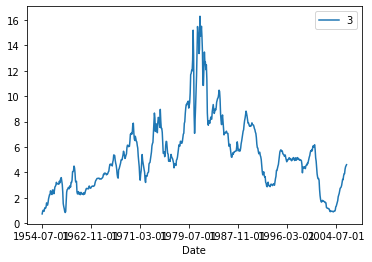

In [4]:
y_df.plot()

Let's get X

In [5]:
X_df = pd.read_csv("X_AR3_3mGovYield.csv", index_col=[0])

In [6]:
X_df.index = y_df.index

In [7]:
X_df

,0,rLag1,rLag2,rLag3
Date,,,,
1954-07-01,1.0,0.64,0.76,0.97
1954-08-01,1.0,0.72,0.64,0.76
1954-09-01,1.0,0.92,0.72,0.64
1954-10-01,1.0,1.01,0.92,0.72
1954-11-01,1.0,0.98,1.01,0.92
...,...,...,...,...
2005-12-01,1.0,3.88,3.71,3.42
2006-01-01,1.0,3.89,3.88,3.71
2006-02-01,1.0,4.24,3.89,3.88


## F.2 MLE from Scratch: Conceptual

We summarize the key equations

1. A linear Gaussian LRM ($y=X \beta + \epsilon$ with $\epsilon \sim N(0,\sigma^2)$) has join log likelihood function of


$$
\ln \mathcal{L}=\frac{-T}{2}\ln(2\pi)-\frac{T}{2}\ln(\sigma^{2})-\frac{1}{2\sigma^{2}}(y-X\beta)'(y-X\beta)
$$

2. The Gaussian LRM has the following ANALYTICAL MLE solution of 
$$
\beta_{MLE} = \beta_{ols} \qquad \text{and} \qquad \sigma^2_{MLE} = \frac{1}{T} (y-X\beta_{MLE})'(y-X\beta_{MLE}).
$$

Hence, no numerical optimization required.

3. Yet, for training purpose, we NUMERICALLY optimize the log likelihood function. This allows us to learn and to compare the numerical solution to the analytical solution. For this simple problem (linear and Gauss), we wont find a meaningful difference.

4. A general numerical optimization optimizes for $\beta$ and $\sigma$. Yet, the computationally more efficient and robust way is to use an insight of the first order conditions (FOC) of the problem. Namely, the MLE for $\beta$ does not depend on the MLE for $\sigma^2$, while the latter depends on the former. 

5. For now, I optimize over $\beta$ and $\sigma^2$ jointly.

## F.3 Joint Neg Log-Likelihood: Python Implementation

Get $T$ and $dim(\beta) =:K$

In [8]:
T = y_df.shape[0]
T

622

In [9]:
K = X_df.shape[1]
K

4

Unit-wise, let me say the following: Units should not matter as long as you keep track on what the units are. But, numerically speaking, you do not want the quantities to become too small. Rounding errors and numerical inaccuracies are not your friend and especially not when the units get too small.

On the other hand, most intuition is build for annualized finance data. 

Last not least, the upcoming optimization did not work for me when I used monthly quantities in decimals.

Hence, here, you see what works. So I am going to use $y$ and $X$ in annualized percentage terms. Hence, 9 stands for 9\%. 

In [10]:
y_df.mean()

3    5.219389
dtype: float64

calculation wise, I prefer to have the data as numpy

In [11]:
import numpy as np
y = np.matrix(y_df)
np.mean(y)

5.219389067524116

In [12]:
X_df.mean()

0        1.000000
rLag1    5.213023
rLag2    5.206994
rLag3    5.201431
dtype: float64

In [13]:
X = np.matrix(X_df)
X[:,1:] = X[:,1:]
np.mean(X, axis=0)

matrix([[1.        , 5.21302251, 5.20699357, 5.20143087]])

A successfull numerical optimization starts with smart (informative) starting values. 

1. I know that the AR(3) coefficients are usually between -1 and 2. I want uninformative, yet realistic starting values. I hence choose "0".

2. I know that the upper bound for $\sigma^2$ is the variance of $y$. 

In [14]:
y.std()**2 #a value of 7.87 stands for (7.87)%^2 meaing 7.87/10000 (decimal units)

7.875277761809741

hence, I set the starting value for $\sigma^2$ to half of the variance of $y$. That is my rather uninformative, yet not crazy guess

In [15]:
#start values for optimization
beta0 = np.zeros(K+1) #K times beta and 1 times sigma2
beta0[K] = 0.5 * y.std()**2

beta0

array([0.        , 0.        , 0.        , 0.        , 3.93763888])

Now, we write the NEGATIVE joint log likelihood function as a python function. The input must be the parameters $\beta$ and $\sigma$, the output is

$$
-1 \times ln(L)
$$

In [16]:
#define -1* log likelihood function as a function of model parameter

def _lnL(param):
    #give input to model parameters
    beta = param[0:K].reshape(K,1) # make it a column vector
    sigma2 = param[K] #last entry of param MUST be variance of residual
    
    # evaluate model (G-LRM) at param. Record only fitting error
    eps = y - X * beta
    
    #compute the G-LRM log likelihood function
    # ln L = -T/2 * ln(2*pi) - T/2 ln(sigma2) - 1/(2*sigma2) * (y - X*beta)'(y - X*beta)
    # Note: constant summands do not affect the soln. Hence, I could leave out the first term on the rhs. yet, I keep it in so students can match code to formula more easily
    term1 = -(T/2) * np.log(2*np.pi) #contains no information on beta nor sigma2. could be deleted
    term2 = -(T/2) * np.log(sigma2) #robust code ensures that sigma2 cannot be negative (prior to executing the log)
    term3 = -1/2 * (eps.T*eps)[0,0]/sigma2

    lnL_T = term1 + term2 + term3
    
    return (-1.0 * lnL_T)

Let's test whether the function runs at least thru for the starting parameters

In [17]:
print(_lnL(beta0))

3771.4419976826057


## F.4 Setting up Numerical Optimization

We are setting bounds for all model parameters. We know the variance is non-negative. You don't want bounds to be too tight. make them large enough.

In [18]:
#lower bounds for optimization
lb = -100 * np.ones(K+1) #initialization
lb[K] = 0.0001*y.std()**2 #implies an R2 of (1-0.0001)

lb

array([-1.00000000e+02, -1.00000000e+02, -1.00000000e+02, -1.00000000e+02,
        7.87527776e-04])

In [19]:
#upper bounds for optimization
ub = 100 * np.ones(K+1) #initialization

ub

array([100., 100., 100., 100., 100.])

Python's scipy.optimize package requires to translate lb and ub into bounds

In [20]:
bounds = tuple( (lb[x], ub[x]) for x in range(0,len(beta0)) )

bounds

((-100.0, 100.0),
 (-100.0, 100.0),
 (-100.0, 100.0),
 (-100.0, 100.0),
 (0.0007875277761809742, 100.0))

## F.5 Calling the Numerical Minimizer and handing over the Neg Log Likelihood

In [21]:
import scipy.optimize as sco

In [22]:
MLE_AR3 = sco.minimize(fun = _lnL, x0 = beta0, bounds=bounds, method='L-BFGS-B', options={'disp':True})

## F.6 Getting the MLE Estimates

In [23]:
MLE_AR3.x

array([ 0.08678835,  1.39376315, -0.61196636,  0.20252034,  0.1737547 ])

The AR(3) parameters coincide with the OLS counterpart. 

The MLE estimate for $\sigma^2$ is 0.1737547. Watch the units! As y and X were in percent, that numbers is in percent square. It might be more intuitive to state the MLE estimate for the vol

$$
std(\epsilon)_{MLE} = \sqrt(\sigma^2) = \sqrt{0.1737547} = 0.4168,
$$

which unit wise says the annualized monthly vol of interest rate shocks was 0.4168 percent.

## F.7 Numerically vs Analytically Optimal Variance of Residual

We know that for G-LRM, the optimal MLE for $\sigma^2$ is the average value of the squared residuals. Hence, lets compute that

In [24]:
beta_MLE = MLE_AR3.x[0:K].reshape(K,1)

beta_MLE

array([[ 0.08678835],
       [ 1.39376315],
       [-0.61196636],
       [ 0.20252034]])

In [25]:
y.shape

(622, 1)

In [26]:
sigma2_MLE_analytical = (y.reshape(T,1)-X*beta_MLE).T * (y.reshape(T,1) - X*beta_MLE) / T

sigma2_MLE_analytical.shape

 

(1, 1)

In [27]:
sigma_MLE_analytical = np.sqrt(sigma2_MLE_analytical[0,0])

sigma_MLE_analytical

0.416842367976678

The RELATIVE numerical error for sigma_MLE is

In [28]:
(np.sqrt(MLE_AR3.x[K]) - sigma_MLE_analytical) / sigma_MLE_analytical

-8.228506834103796e-06

which is negligebly small. Yet, if you find the residual variance analytically, you reduce the parameter space by 20\%. So, if you do not compute it analytically, your computer resources spend 20\% of their time on a redundant task.